In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("tab10")
import plotly.graph_objs as go
import plotly.express as px

import category_encoders as ce

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
# reading .csv file
df=pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
print('Dataframe has {} rows and {} columns'.format(df.shape[0],df.shape[1]))
df.head()

Dataframe has 4282 rows and 8 columns


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


creating two new columns to save brand and car name

In [94]:
df['brand']=df['name'].apply(lambda x: ' '.join(x.split(' ')[:2]) if 'Land' in x else x.split(' ')[0])
df['car']=df['name'].apply(lambda x: ' '.join(x.split(' ')[2:]) if 'Land' in x else ' '.join(x.split(' ')[1:]))
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,car
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 AC
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon R LXI Minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC


In [95]:
#list of all brands and cars
brands=list(df['brand'].unique())
cars=list(df['car'].unique())

In [96]:
bharat_stage= [text for idx,text in enumerate(cars) if "BS" in text]
bharat_stage[:5]

['Alto LX BSIII',
 'Wagon R VXI BS IV with ABS',
 'Wagon R VXI BS IV',
 'Eeco 5 Seater AC BSIV',
 'Omni Maruti Omni MPI STD BSIII 5-STR W/ IMMOBILISER']

### Cleaning the data
few car names have bharat stage emission standards in them, which are creating duplicate values.
cleaning the text to get accurate results

In [97]:
def removing_BS(text):
    text= re.sub('BS-VI|BS-IV|BS-III|BS-II|BS VI|BS IV|BS III|BS II|BS I|BSVI|BSIV|BSIII|BSII|BS I|','',text)
    return text

Stopwords=set(stopwords.words('english'))
def removing_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in Stopwords])

df['car']=df['car'].apply(lambda text: removing_BS(text).lower())
df['car']=df['car'].apply(lambda text:removing_stopwords(text))
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,car
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800 ac
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,wagon r lxi minor
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,verna 1.6 sx
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,redigo option
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,amaze vx i-dtec


In [98]:
car_rename={'Maruti':{'alto':'Alto','dzire':'Swift Dzire','swift':'Swift','wagon':'Wagon R','ertiga':'Ertiga','sx4':'SX4',
                      'celerio':'Celerio','cross':'S-Cross','zen':'Zen','baleno':'Baleno','eeco':'Eeco','omni':'Omni',
                      'star':'A-Star','ritz':'Ritz','esteem':'Esteem','800':'800','vitara':'Brezza','ignis':'Ignis',
                      'gypsy':'Gypsy','presso':'S-Presso','ciaz':'Ciaz','estilo':'Estilo'},
           'Hyundai':{'elite':'Elite i20','grand':'Grand i10','active':'i20 active','eon':'Eon','santro':'Santro','sonata':'Sonata',
                      'i10':'i10','verna':'Verna','i20':'i20','creta':'Creta','xcent':'Xcent','accent':'Accent','getz':'Getz',
                      'elantra':'Elantra','venue':'Venue','tucson':'Tucson','santa':'Santa Fe'},
           'Datsun':{'redi':'Redigo','plus':'Go Plus','go':'Go'},
           'Honda':{'amaze':'Amaze','jazz':'Jazz','city':'City','br-v':'BR-V','wr-v':'WR-V','brio':'Brio','mobilio':'Mobilio',
                   'civic':'Civic','accord':'Accord','cr-v':'CR-V','brv':'BR-V'},
           'Tata':{'nano':'Nano','vista':'Indica Vista','indigo':'Indigo','indica':'Indica','safari':'Safari','nexon':'Nexon',
                  'manza':'Manza','zest':'Zest','sumo':'Sumo','bolt':'Bolt','hexa':'Hexa','tigor':'Tigor','tiago':'Tiago',
                  'xenon':'Nexon','harrier':'Harrier','aria':'Aria','altroz':'Altroz','venture':'Venture','spacio':'Sumo','winger':'Winger'},
           'Chevrolet':{'beat':'Beat','spark':'Spark','cruze':'Cruze','sail':'Sail','optra':'Optra','aveo':'Aveo','enjoy':'Enjoy',
                       'captiva':'Captiva','tavera':'Tavera'},
           'Toyota':{'innova':'Innova','fortuner':'Fortuner','etios':'Etios','corolla':'Corolla','camry':'Camry','yaris':'Yaris',
                    'qualis':'Qualis'},
           'Jaguar':{'xf 3.0 litre':'XF','xf 5.0 litre':'XF','xj 5.0':'XJ','xf 2.2 litre':'XF'},
           'Mercedes-Benz':{'c-class':'C-Class','e-class':'E-Class','m-class':'M-Class','b-class':'B-Class',
                            's-class':'S-Class','gls':'GLS','gl-class 350':'GL350','b class':'B-Class'},
           'Audi':{'a6':'A6','a4':'A4','q3':'Q3','q5':'Q5','a8':'A8','q3':'Q3','q7':'Q7','a5':'A5','rs7':'RS7'},
           'Skoda':{'laura':'Laura','rapid':'Rapid','superb':'Superb','octavia':'Octavia','fabia':'Fabia','yeti':'Yeti'},
           'BMW':{'x5':'X5','x1':'X1','7 series':'7 Series','5 series':'5 Series','3 series':'3 Series'},
           'Mahindra':{'xuv500':'XUV500','bolero':'Bolero','xylo':'Xylo','scorpio':'Scorpio','quanto':'Quanto','verito':'Verito',
                      'tuv 300':'TUV 300','kuv':'KUV','thar':'Thar','marazzo':'Marazzo','renault logan':'Verito','jeep':'Jeep',
                      'nuvosport':'NuvoSport','alturas':'Alturas','ingenio':'Imperio','xuv300':'XUV300','supro':'Supro'},
           'Ford':{'figo':'Figo','ecosport':'EcoSport','endeavour':'Endeavour','fiesta':'Fiesta','freestyle':'Freestyle','ikon':'Ikon',
                  'aspire':'Aspire','classic':'Fiesta','fusion':'Fusion'},
           'Nissan':{'micra':'Micra','sunny':'Sunny','terrano':'Terrano','evalia':'Evalia','trail':'X-Trail','kicks':'Kicks'},
           'Renault':{'kwid':'Kwid','duster':'Duster','scala':'Scala','lodgy':'Lodgy','captur':'Captur','fluence':'Fluence','pulse':'Pulse',
                     'triber':'Triber','koleos':'Koleos'},
           'Volkswagen':{'polo':'Polo','vento':'Vento','ameo':'Ameo','jetta':'Jetta','crosspolo':'CrossPolo','passat':'Passat'},
           'Volvo':{'v40':'V40','xc60':'XC60','xc 90':'XC90'},
           'Land Rover':{'discovery':'Discovery','evoque':'Range Rover Evoque','range rover 4.4 diesel lwb vogue':'range rover 4.4'}}

In [99]:
# function to rename car names
def rename_car(brnd,x):
    text=x
    temp_dict=car_rename[brnd]
    for key,val in temp_dict.items():
        if key in text:
            text=val
            return(text)
            break
        else:continue


Renaming the cars, there are a lot of varients in a single model (i.e you have high,medium and lower varients in a given car model)

so Swift ZDI, Swift LDI,Swift VDI, all will be renamed to just 'Swift'.

In [100]:
df['Model']=0
col_num=df.columns.get_loc("Model")
for idx in range(0,df.shape[0]):
    brand=df.iloc[idx]['brand']
    car=df.iloc[idx]['car']
    df.iloc[idx,col_num]=rename_car(brand,car)
    
df.drop(['car','name'],axis=1,inplace=True)
df['vehicle_age']=2020-df['year']
col_order=[  'brand', 'Model','year','vehicle_age', 'km_driven', 'fuel','transmission', 'seller_type', 'owner','selling_price']
df=df[col_order]
df.head()

,brand,Model,year,vehicle_age,km_driven,fuel,transmission,seller_type,owner,selling_price
0,Maruti,800,2007,13,70000,Petrol,Manual,Individual,First Owner,60000
1,Maruti,Wagon R,2007,13,50000,Petrol,Manual,Individual,First Owner,135000
2,Hyundai,Verna,2012,8,100000,Diesel,Manual,Individual,First Owner,600000
3,Datsun,Redigo,2017,3,46000,Petrol,Manual,Individual,First Owner,250000
4,Honda,Amaze,2014,6,141000,Diesel,Manual,Individual,Second Owner,450000


In [101]:
hatchback=['800','Wagon R','Alto','Celerio','Tigor','i10','Santro','Grand i10','i20','Swift','Indica','Eon',
          'Indica Vista','Getz','Elite i20','Brio','Micra','Kwid','Beat','Zen','Baleno','Nano','Figo','Spark',
          'Bolt','Fabia','Jazz','Tiago','A-Star','Polo','Ritz','Estilo','Pulse','Ignis','Freestyle','S-Presso',
          'Altroz','Redigo','Go Plus','Go','B-Class','V40']
sedan=['Verna','Indigo','Corolla','Ciaz','City','A6','Superb','3 Series','Elantra','Swift Dzire','Etios','Civic',
      'Rapid','A8','Jetta','A4','SX4','7 Series','Sonata','Cruze','Vento','Esteem','5 Series','Scala','Verito',
      'Optra','Manza','Accord','Ikon','Laura','Octavia','Accent','Sunny','A5','Camry','Passat','Fusion','Fluence',
      'RS7','Yaris','XF','XJ','C-Class','E-Class','S-Class','M-Class']
compact_sedan=['Amaze','Xcent','Sail','Ameo','Zest','Aspire','Aveo','Fiesta']
suv=['Q5','Q7','Scorpio','Jeep','XUV500','Bolero','Sumo','Yeti','Endeavour','Safari','Fortuner','BR-V','Tucson',
    'X5','Gypsy','Hexa','Captiva','Thar','Alturas','Aria','CR-V','Santa Fe','Koleos','Harrier','X-Trail','GLS','GL350',
    'Discovery','Range Rover Evoque','range rover 4.4','XC90','XC60']
muv=['Enjoy','Innova','Tavera','Xylo','Ertiga','Quanto','Mobilio','Marazzo','Lodgy','NuvoSport','Evalia','Winger','Qualis']
compact_suv=['Creta','Brezza','EcoSport','Terrano','Duster','X1','XUV300','TUV 300','WR-V','Q3','Kicks','Triber']
crossover=['Venue','S-Cross','i20 active','KUV','Nexon','Captur']
minivan=['Omni','Eeco','Supro','Venture']
pickup=['Imperio']

vehicle_class={'hatchback':hatchback,'compact_sedan':compact_sedan,'sedan':sedan,
               'suv':suv,'compact_suv':compact_suv,'muv':muv,'pickup':pickup,'crossover':crossover,'minivan':minivan}


grouping the cars into segments of its own.

1. Hatchback
2. Sedan
3. Compact Sedan
4. SUV
5. Compact SUV
6. MUV
7. Crossover
8. Minivan
9. Pickup

This gives us more information with respect to other parameters.

In [102]:
df['Class']=0
col_num=df.columns.get_loc("Class")
for idx in range(0,df.shape[0]):
    car_name=df.iloc[idx]['Model']
    for key,val in vehicle_class.items():
        if car_name in val:
            df.iloc[idx,col_num]=key
df.head()

,brand,Model,year,vehicle_age,km_driven,fuel,transmission,seller_type,owner,selling_price,Class
0,Maruti,800,2007,13,70000,Petrol,Manual,Individual,First Owner,60000,hatchback
1,Maruti,Wagon R,2007,13,50000,Petrol,Manual,Individual,First Owner,135000,hatchback
2,Hyundai,Verna,2012,8,100000,Diesel,Manual,Individual,First Owner,600000,sedan
3,Datsun,Redigo,2017,3,46000,Petrol,Manual,Individual,First Owner,250000,hatchback
4,Honda,Amaze,2014,6,141000,Diesel,Manual,Individual,Second Owner,450000,compact_sedan


Dropping electric vehicle as it makes only one instance of 4282, which is insignificant.

In [103]:
print((df['fuel'].value_counts()))
df=df[df['fuel']!='Electric'].reset_index()
df.drop('index',axis=1,inplace=True)

Diesel      2112
Petrol      2106
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [104]:
Luxury_brand=['Audi','BMW','Mercedes-Benz','Jaguar','Land Rover','Volvo']
luxury_df=df[df['brand'].isin(Luxury_brand)].reset_index()
luxury_df.drop('index',axis=1,inplace=True)
regular_df=df[~df['brand'].isin(Luxury_brand)].reset_index()
regular_df.drop('index',axis=1,inplace=True)
print(luxury_df.shape,regular_df.shape)
luxury_df.head()

(149, 11) (4132, 11)


,brand,Model,year,vehicle_age,km_driven,fuel,transmission,seller_type,owner,selling_price,Class
0,Jaguar,XF,2014,6,28000,Diesel,Automatic,Dealer,First Owner,1964999,sedan
1,Mercedes-Benz,C-Class,2013,7,59000,Diesel,Automatic,Dealer,First Owner,1425000,sedan
2,Audi,Q5,2011,9,175900,Diesel,Automatic,Dealer,First Owner,1190000,suv
3,Audi,A6,2013,7,50000,Diesel,Automatic,Dealer,First Owner,1735000,sedan
4,Mercedes-Benz,C-Class,2012,8,33800,Diesel,Automatic,Dealer,Second Owner,1375000,sedan


## Model Building

removing different brands of vehicle whose frequency is very low to be able to help the predictions.

In [105]:
shape_before=df.shape
vc=df.brand.value_counts(normalize=True)
low_freq_brands=list(vc[vc.values<=0.02].index)

df=df[~df['brand'].isin(low_freq_brands)]
df=df.reset_index()
df.drop('index',axis=1,inplace=True)
df.head()
print(shape_before,df.shape)

(4281, 11) (3963, 11)


In [106]:
#df.drop(['brand','year'],axis=1,inplace=True)
df=df[['Model','vehicle_age','km_driven','fuel','transmission','owner','seller_type','selling_price']]
df.head()

,Model,vehicle_age,km_driven,fuel,transmission,owner,seller_type,selling_price
0,800,13,70000,Petrol,Manual,First Owner,Individual,60000
1,Wagon R,13,50000,Petrol,Manual,First Owner,Individual,135000
2,Verna,8,100000,Diesel,Manual,First Owner,Individual,600000
3,Amaze,6,141000,Diesel,Manual,Second Owner,Individual,450000
4,Alto,13,125000,Petrol,Manual,First Owner,Individual,140000


In [107]:
# brand_car_dict={}
# mean_sell=df.groupby(['brand','Model'])['selling_price'].mean().reset_index()
# car_brands=mean_sell.brand.unique()
# for car_brand in car_brands:
#     cars=list(mean_sell.loc[mean_sell['brand']==car_brand,'Model'].unique())
#     brand_car_dict[car_brand]=cars
# brand_car_dict

In [108]:
# import json
# with open("brand_car_dict.json","w") as f:
#     f.write(json.dumps(brand_car_dict))

In [109]:
vc0=df.Model.value_counts()
low_freq=list(vc0[vc0.values<2].index)
shape_before=df.shape
df=df[~df['Model'].isin(low_freq)].reset_index()
df=df.drop('index',axis=1)
print(shape_before,df.shape)
df.head()

(3963, 8) (3948, 8)


,Model,vehicle_age,km_driven,fuel,transmission,owner,seller_type,selling_price
0,800,13,70000,Petrol,Manual,First Owner,Individual,60000
1,Wagon R,13,50000,Petrol,Manual,First Owner,Individual,135000
2,Verna,8,100000,Diesel,Manual,First Owner,Individual,600000
3,Amaze,6,141000,Diesel,Manual,Second Owner,Individual,450000
4,Alto,13,125000,Petrol,Manual,First Owner,Individual,140000


In [110]:
target='selling_price'
x=list(df.columns)
x.remove(target)


splitting the data into train and test

try to tune hyperparameters by scoring the validation sample, instead of test to prevent overtraining( where you try to fit the model to get the best test result)

as I have very less data, I'm splitting it into only train and test

In [111]:
df[x]

,Model,vehicle_age,km_driven,fuel,transmission,owner,seller_type
0,800,13,70000,Petrol,Manual,First Owner,Individual
1,Wagon R,13,50000,Petrol,Manual,First Owner,Individual
2,Verna,8,100000,Diesel,Manual,First Owner,Individual
3,Amaze,6,141000,Diesel,Manual,Second Owner,Individual
4,Alto,13,125000,Petrol,Manual,First Owner,Individual
...,...,...,...,...,...,...,...
3943,i20,6,80000,Diesel,Manual,Second Owner,Individual
3944,i20,6,80000,Diesel,Manual,Second Owner,Individual
3945,800,11,83000,Petrol,Manual,Second Owner,Individual
3946,Creta,4,90000,Diesel,Manual,First Owner,Individual


In [112]:
x_train, x_test, y_train, y_test = train_test_split(df[x],df[target],random_state=10,stratify=df['Model'],test_size=0.25)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

x_train.head()

(2961, 7) (987, 7) (2961,) (987,)


,Model,vehicle_age,km_driven,fuel,transmission,owner,seller_type
3709,Swift,11,67580,Petrol,Manual,Second Owner,Individual
554,Swift Dzire,3,46507,Diesel,Manual,First Owner,Trustmark Dealer
2365,Ritz,9,80000,Diesel,Manual,First Owner,Individual
1687,Thar,2,5000,Diesel,Manual,First Owner,Individual
89,SX4,9,110000,Petrol,Manual,Third Owner,Individual


As we have very few instances, instead of removing the outliers (which reduces our data further), a new column is created to flag the rows which have outliers

In [113]:
def outlier_flag(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print(fence_low,fence_high)
    df_in.loc[((df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)),'outlier_flag']='o_'+col_name
    return df_in

In [114]:
for data in [x_train,x_test]:
    for col in ['km_driven','vehicle_age']:
        data=outlier_flag(data,col)
    data['outlier_flag'].fillna(value='no_outlier',inplace=True)

-47500.0 172500.0
-3.5 16.5
-47500.0 172500.0
-5.0 19.0


In [115]:
iqr_dict={'km_driven_low':0,'km_driven_high':0,'vehicle_age_low':0,'vehicle_age':0}
def outlier_flag(df_in, col_name,is_test_df=False):
    if is_test_df==True:
        fence_low=iqr_dict[col+'_low']
        fence_high=iqr_dict[col+'_high']
        df_in.loc[((df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)),'outlier_flag']='o_'+col_name
    else:
        q1 = df_in[col_name].quantile(0.25)
        q3 = df_in[col_name].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        iqr_dict[col+'_low']=fence_low
        iqr_dict[col+'_high']=fence_high
        df_in.loc[((df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)),'outlier_flag']='o_'+col_name
    return df_in

In [116]:
iqr_dict

{'km_driven_low': 0,
 'km_driven_high': 0,
 'vehicle_age_low': 0,
 'vehicle_age': 0}

In [117]:
# iqr_dict
# with open("iqr_dict.json","w") as f:
#     f.write(json.dumps(iqr_dict))

In [118]:
for text,data in [('train',x_train),('test',x_test)]:
    for col in ['km_driven','vehicle_age']:
        if text=='test':
            is_test_df=True
        else:
            is_test_df=False
        data=outlier_flag(data,col,is_test_df)
    data['outlier_flag'].fillna(value='no_outlier',inplace=True)

In [119]:
te=ce.TargetEncoder(verbose=1,cols=['Model'])

In [120]:
x_train=te.fit_transform(x_train,y_train,)
x_test=te.transform(x_test)
x_train.head()

,Model,vehicle_age,km_driven,fuel,transmission,owner,seller_type,outlier_flag
3709,398801.455882,11,67580,Petrol,Manual,Second Owner,Individual,no_outlier
554,495615.375000,3,46507,Diesel,Manual,First Owner,Trustmark Dealer,no_outlier
2365,260750.000000,9,80000,Diesel,Manual,First Owner,Individual,no_outlier
1687,657295.083165,2,5000,Diesel,Manual,First Owner,Individual,no_outlier
89,283088.235294,9,110000,Petrol,Manual,Third Owner,Individual,no_outlier


In [121]:
te

TargetEncoder(cols=['Model'], drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=1)

In [122]:
# import pickle
# with open('target_encoder.pickle','wb') as f:
#     pickle.dump(te,f)

In [123]:
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)
print(x_train.shape,x_test.shape)

(2961, 20) (987, 20)


In [124]:
x_train.head()

,Model,vehicle_age,km_driven,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,outlier_flag_no_outlier,outlier_flag_o_km_driven,outlier_flag_o_vehicle_age
3709,398801.455882,11,67580,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
554,495615.375000,3,46507,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0
2365,260750.000000,9,80000,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
1687,657295.083165,2,5000,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
89,283088.235294,9,110000,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0


In [125]:
x_train_cols=x_train.columns
x_test_cols=x_test.columns

missing=(set(x_train_cols)-set(x_test_cols))
for str in missing:
    x_test[str]=0

x_train_cols=x_train.columns
x_test_cols=x_test.columns
(set(x_train_cols)-set(x_test_cols))

set()

In [126]:
# with open("train_cols.json","w") as f:
#     f.write(json.dumps(list(x_train_cols)))

In [127]:
print(x_train.shape,x_test.shape)

(2961, 20) (987, 20)


In [128]:
#importing required packages for model building
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [129]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [130]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [132]:
# #creating parameter grid for random search
# grid_forest_1={'criterion':['mse','mae'],
#       'n_estimators':np.arange(5,100,10),
#       'max_depth':np.arange(2,7,1),
#       'min_samples_split':np.arange(0.01,0.1,0.01),
#       'max_features':['log2','sqrt','auto'],    
#       'min_weight_fraction_leaf':np.arange(0.001,0.25,0.05)
# }

# rf_random=RandomizedSearchCV(estimator=rf,param_distributions=grid_forest_1,n_iter=500,n_jobs=-1,cv=3,verbose=1,random_state=1)


# rf_random.fit(x_train,y_train)


In [38]:
# rf_random=rf_random.best_estimator_
# np.sqrt(mean_squared_error(rf_random.predict(x_test),y_test))

136961.3242877295

In [39]:
x_train.head()

,Model,vehicle_age,km_driven,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,outlier_flag_no_outlier,outlier_flag_o_km_driven,outlier_flag_o_vehicle_age
3709,398801.455882,11,67580,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
554,495615.375000,3,46507,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0
2365,260750.000000,9,80000,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
1687,657295.083165,2,5000,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0
89,283088.235294,9,110000,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0


In [51]:
print(x)

['Model', 'vehicle_age', 'km_driven', 'fuel', 'transmission', 'Class', 'owner', 'seller_type']


In [212]:
def predict_price(Model,vehicle_age,km_driven,fuel,transmission,owner,seller_type):
    col=['Model', 'vehicle_age', 'km_driven', 'fuel', 'transmission', 'owner', 'seller_type']
    data=[Model, vehicle_age, km_driven, fuel, transmission, owner, seller_type]
    predict_df=pd.DataFrame(data, columns = col)
    return predict_df  #lr_clf.predict([x])[0]

In [90]:
Model='i20'
vehicle_age=8
km_driven=50000
fuel='Petrol'
transmission='Manual'
owner='First Owner'
seller_type='Individual'


In [91]:
col=['Model', 'vehicle_age', 'km_driven', 'fuel', 'transmission', 'owner', 'seller_type']
data=[[Model,vehicle_age,km_driven,fuel,transmission,owner,seller_type]]
predict_df=pd.DataFrame(data, columns = col)
for col in ['vehicle_age','km_driven']:
    fence_low=iqr_dict[col+'_low']
    fence_high=iqr_dict[col+'_high']
    predict_df.loc[((predict_df[col] < fence_low) | (predict_df[col] > fence_high)),'outlier_flag']='o_'+col
predict_df['outlier_flag'].fillna(value='no_outlier',inplace=True)
predict_df=te.transform(predict_df)
predict_df=pd.get_dummies(predict_df)
missing=(set(x_train_cols)-set(predict_df))
for strn in missing:
    predict_df[strn]=0
#predict_df[X]=1#df[x].iloc[0,:].values
grid_search_rf.predict(predict_df)[0]

336323.06153846154

In [94]:
data

['800',
 13,
 70000,
 'Petrol',
 'Manual',
 'hatchback',
 'First Owner',
 'Individual']

In [97]:
# data =[list(df[x].iloc[0,:].values)]
  
# # Create the pandas DataFrame 
# xyz = pd.DataFrame(data, columns = X)
# xyz

,Model,vehicle_age,km_driven,fuel,transmission,Class,owner,seller_type
0,800,13,70000,Petrol,Manual,hatchback,First Owner,Individual


In [210]:
without_class=['Model', 'vehicle_age', 'km_driven', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'outlier_flag_no_outlier', 'outlier_flag_o_km_driven',
       'outlier_flag_o_vehicle_age']

rf_1=RandomForestRegressor(criterion='mae',max_depth=8,max_features='auto',min_impurity_split=0.001,min_weight_fraction_leaf=0.001,n_estimators=70,random_state=999)
rf_1.fit(x_train,y_train)
np.sqrt(mean_squared_error(rf_1.predict(x_test),y_test))

109318.24671115616

<module 'matplotlib.pyplot' from 'C:\\Users\\prana\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

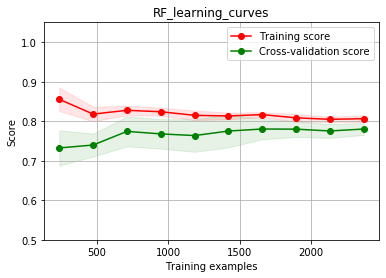

In [208]:
plot_learning_curve(estimator=rf_random,title='RF_learning_curves',X=x_train,y=y_train,ylim=(0.5,1.05),cv=5)

In [40]:
rf_random

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.01, min_weight_fraction_leaf=0.001,
                      n_estimators=65, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [133]:
grid_forest_2={'criterion':['mae'],
      'n_estimators':np.arange(60,80,5),
      'max_depth':(6,7,8),
      'min_samples_split':np.arange(0.001,0.01,0.008),
      'max_features':['auto'],    
      'min_weight_fraction_leaf':np.arange(0.0001,0.01,0.001)
}

In [134]:
rf=RandomForestRegressor()
grid_search_rf=GridSearchCV(estimator=rf,param_grid = grid_forest_2,cv=3,n_jobs=-1,verbose=1)

In [135]:
grid_search_rf.fit(x_train,y_train)
grid_search_rf.best_params_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  6.6min finished


{'criterion': 'mae',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_split': 0.001,
 'min_weight_fraction_leaf': 0.0021,
 'n_estimators': 75}

In [136]:
grid_search_rf=grid_search_rf.best_estimator_
grid_search_rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.001, min_weight_fraction_leaf=0.0021,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

<module 'matplotlib.pyplot' from 'C:\\Users\\prana\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

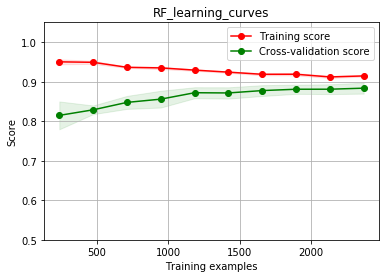

In [137]:
plot_learning_curve(estimator=grid_search_rf,title='RF_learning_curves',X=x_train,y=y_train,ylim=(0.5,1.05),cv=5)

In [142]:
with open('car_prices_model.pickle','wb') as f:
    pickle.dump(grid_search_rf,f)

In [138]:
np.sqrt(mean_squared_error(grid_search_rf.predict(x_test),y_test))

117491.40385575511

In [139]:
grid_search_rf.score(x_test,y_test)

0.8883265649457868

In [140]:
mean_absolute_percentage_error(y_test,grid_search_rf.predict(x_test))

20.21732602580417

In [141]:
r2_score(y_test,grid_search_rf.predict(x_test))

0.8883265649457868